1. 1차원데이터분석

1. 변수종류파악( 수치형/ 범주형/ 시간형) info()

2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3. 시각화

도수분포표/ 히스토그램/ 상자그림
2. 2차원데이터분석

1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

산점도/ 회귀직선/ 히트맵
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사
carrier_deay : 항공사 지연 요인
atc_delay : ATC 항공교통관제 지연 요인
weather_delay : 날씨로 인한 지연 요인

# 시각적 분석
1. 히스토그램
2. 박스플롯
전체, 항공사별 분석
3. 추가 분석
날짜(타임라인 비교)
4. 상관관계 분석
5. 공분산 확인
💡추가: 다음 분석 방향 계획

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# 시스템 환경에 따라 폰트를 자동으로 설정해주는 함수
def get_font_family():
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        return "AppleGothic"
    elif system_name == "Windows":
        return "Malgun Gothic"
    else:
        # Linux (Colab)
        !apt-get install fonts-nanum -qq > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        return "NanumBarunGothic"

# 한글 폰트 적용
plt.rc("font", family=get_font_family())
plt.rc("axes", unicode_minus=False)

# 레티나 디스플레이 설정 (선명하게)
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 150



In [3]:
df = pd.read_csv('abc/data/airline_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [4]:
df.select_dtypes(include='number')

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194
...,...,...,...
33463,6.186422,8.798491,1.651940
33464,9.522167,3.591133,0.261084
33465,9.164179,2.664179,0.343284
33466,5.152293,1.964520,0.122817


범주형 변수:
수치형 변수: pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [5]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [6]:
# 범주형 변수의 값 목록 
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [7]:
#항공사별로 기술통계 비교
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [8]:
[df['pct_carrier_delay'] == 100]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 33463    False
 33464    False
 33465    False
 33466    False
 33467    False
 Name: pct_carrier_delay, Length: 33468, dtype: bool]

In [9]:
[df['pct_atc_delay']== 100]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 33463    False
 33464    False
 33465    False
 33466    False
 33467    False
 Name: pct_atc_delay, Length: 33468, dtype: bool]

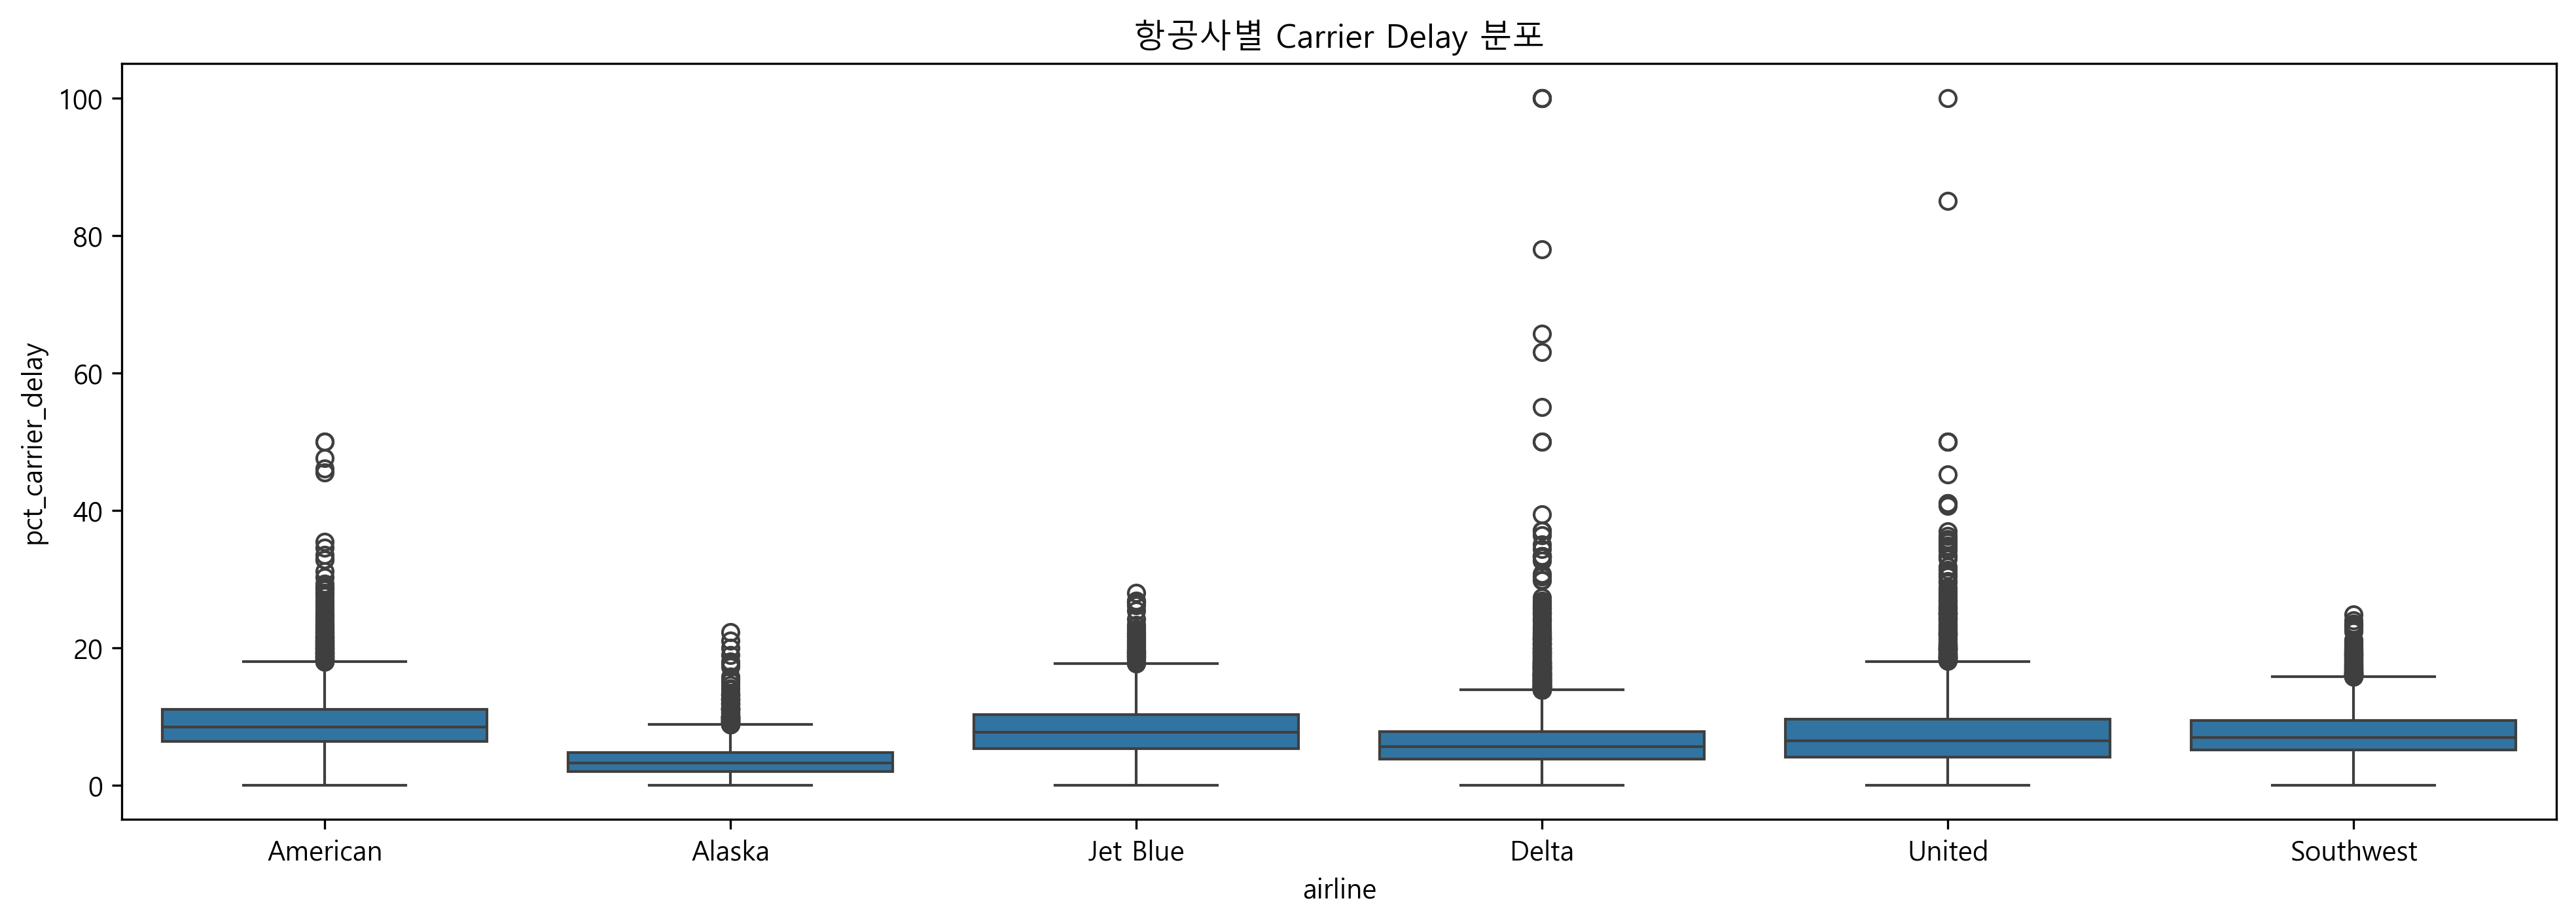

In [22]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df, x='airline', y='pct_carrier_delay')
plt.title("항공사별 Carrier Delay 분포")
plt.show()

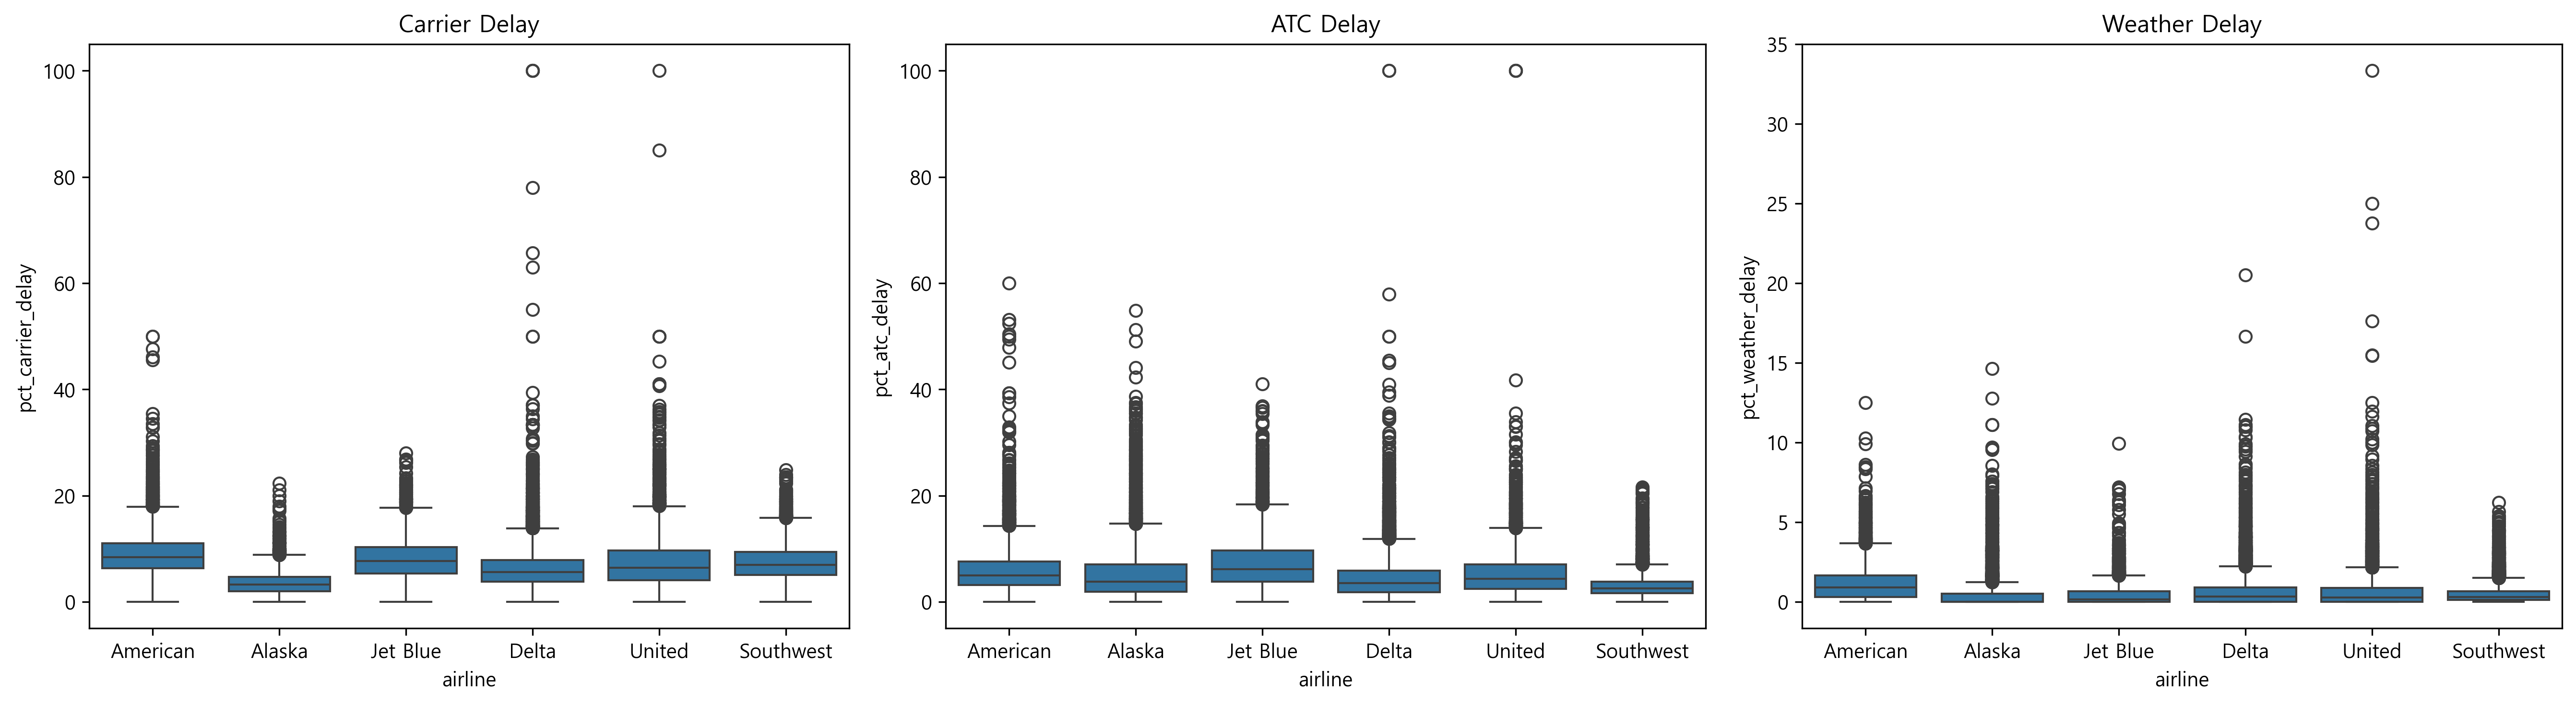

In [23]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1행 3열 subplot 만들기

# 1. Carrier Delay
sns.boxplot(data=df, x='airline', y='pct_carrier_delay', ax=axes[0])
axes[0].set_title("Carrier Delay")

# 2. ATC Delay
sns.boxplot(data=df, x='airline', y='pct_atc_delay', ax=axes[1])
axes[1].set_title("ATC Delay")

# 3. Weather Delay
sns.boxplot(data=df, x='airline', y='pct_weather_delay', ax=axes[2])
axes[2].set_title("Weather Delay")

plt.tight_layout()
plt.show()


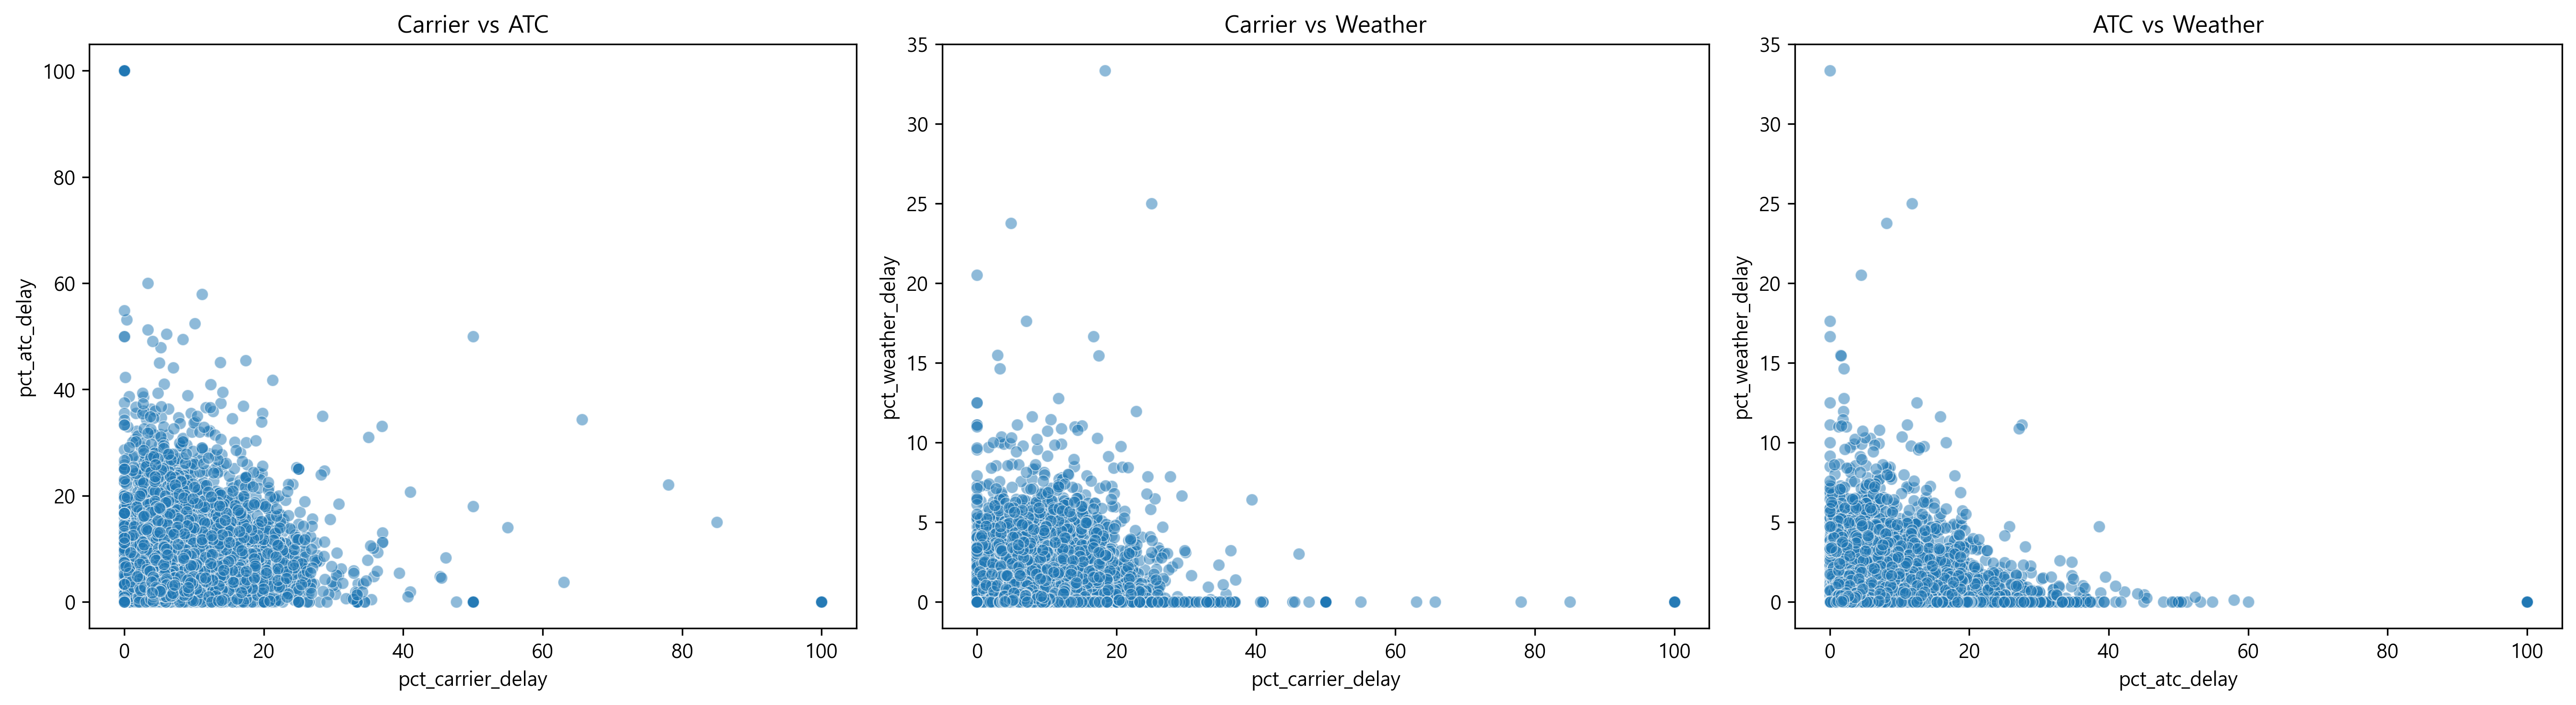

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 도화지 준비 (1행 3열)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Carrier vs ATC
sns.scatterplot(data=df, x='pct_carrier_delay', y='pct_atc_delay', ax=axes[0], alpha=0.5)
axes[0].set_title("Carrier vs ATC")

# 2. Carrier vs Weather
sns.scatterplot(data=df, x='pct_carrier_delay', y='pct_weather_delay', ax=axes[1], alpha=0.5)
axes[1].set_title("Carrier vs Weather")

# 3. ATC vs Weather
sns.scatterplot(data=df, x='pct_atc_delay', y='pct_weather_delay', ax=axes[2], alpha=0.5)
axes[2].set_title("ATC vs Weather")

# 여백 정리
plt.tight_layout()
plt.show()


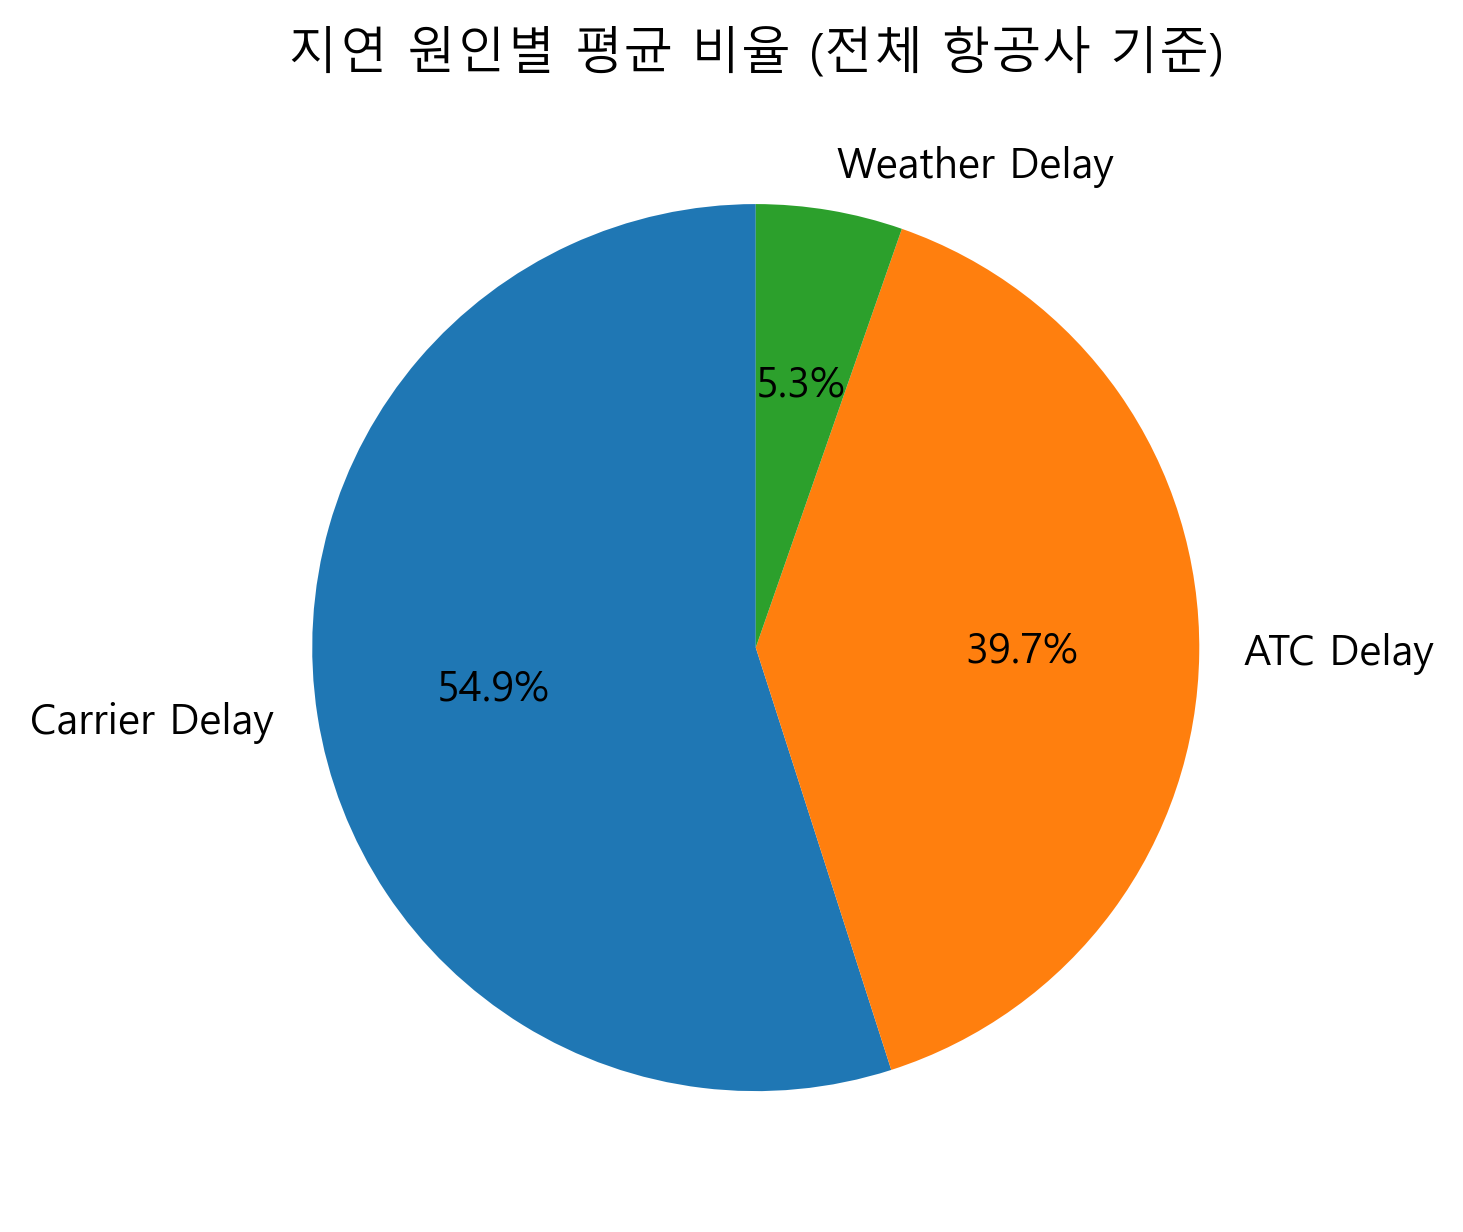

In [28]:
import matplotlib.pyplot as plt

# 전체 평균 지연률
mean_delays = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean()

# 라벨 이름 정리
labels = ['Carrier Delay', 'ATC Delay', 'Weather Delay']

# 파이 차트 그리기
plt.figure()
plt.pie(mean_delays, labels=labels, autopct='%.1f%%', startangle=90)
plt.title("지연 원인별 평균 비율 (전체 항공사 기준)")
plt.show()
